# image controller

test list
2134
2198

In [1]:
box = (640,417,537,255)  


In [1]:
from my_tools.control import ImageController
controller = ImageController()

no function apply using default function


In [2]:
controller.run()

# model test


640-1280 is good
1449.jpg

In [3]:
from PIL import Image
import matplotlib.pyplot as plt


In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# # Load model directly
# from transformers import AutoImageProcessor, SegformerForSemanticSegmentation

# processor = AutoImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280",return_tensors="pt")
# model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280")

In [5]:
# custom preprocess
from torchvision import transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

custom_process = transforms.Compose([

    transforms.Resize((512,1024)),
    transforms.ToTensor(),
    transforms.Normalize(mean = mean,std= std)

])

/home/lpr/miniconda3/envs/CarlaEnv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from seg.seg_utils import HF_segmodel

# model_repo = "nvidia/segformer-b0-finetuned-cityscapes-768-768"
model_repo = "nvidia/segformer-b0-finetuned-cityscapes-512-1024"
# model_repo = "nvidia/segformer-b0-finetuned-cityscapes-640-1280"


# seg_model = HF_segmodel(model_repo,custom_processor=custom_process)
seg_model = HF_segmodel(model_repo)

using  cuda


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/home/lpr/miniconda3/envs/CarlaEnv/lib/python3.8/site-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [7]:
seg_model.model.device

device(type='cuda', index=0)

In [8]:
def seg_wraper(img,crop_box):
    y1,y2, x1,x2 = crop_box
    img = img[y1:y2, x1:x2]
    pred, overlayed = seg_model.predict(img,give_overlay=True)

    seg = seg_model.get_seg_image(pred)
    
    return [seg,overlayed]

# controller.apply_processor(seg_wraper)
controller.process = seg_wraper

In [10]:
controller.run()

In [14]:
pred = controller.output

AttributeError: 'ImageController' object has no attribute 'output'

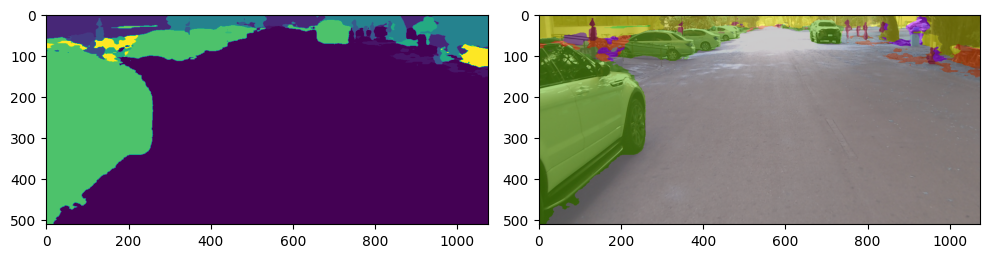

In [21]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10, 30))
ax[0].imshow(pred)
ax[1].imshow(overlayed)

plt.tight_layout()  # Optional: Adjust subplot parameters to give specified padding
plt.show()


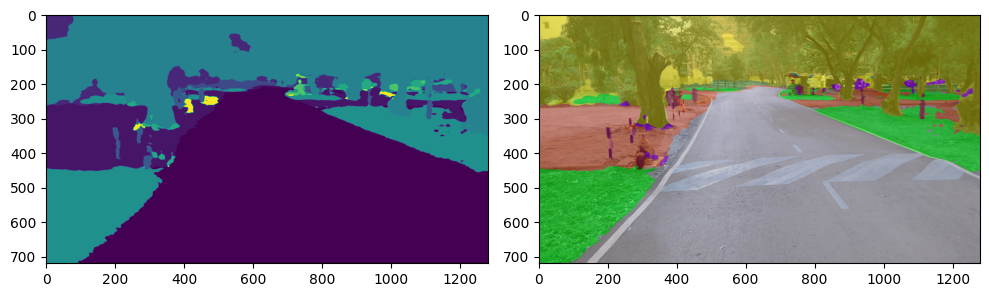

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10, 30))
ax[0].imshow(pred)
ax[1].imshow(overlayed)

plt.tight_layout()  # Optional: Adjust subplot parameters to give specified padding
plt.show()


# Tensorrt

In [ ]:
from optimum.onnxruntime import ORTModelForSequenceClassification
from transformers import AutoTokenizer

ort_model = ORTModelForSequenceClassification.from_pretrained(
  "philschmid/tiny-bert-sst2-distilled",
  export=True,
  provider="CUDAExecutionProvider",
)

tokenizer = AutoTokenizer.from_pretrained("philschmid/tiny-bert-sst2-distilled")
inputs = tokenizer("expectations were low, actual enjoyment was high", return_tensors="pt", padding=True)

outputs = ort_model(**inputs)
assert ort_model.providers == ["CUDAExecutionProvider", "CPUExecutionProvider"]